# Step 3

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [30]:
# Python SQL toolkit and object Relational Mapper
import sqlalchemy
from sqlalchemy import create_engine, MetaData
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import Column, Integer, String, Numeric, Text, Float, Date

In [31]:
# Connect to database
engine = create_engine("sqlite:///hawaii.sqlite")
conn = engine.connect()

In [32]:
Base = automap_base()


In [33]:
Base.prepare(engine, reflect=True)

In [34]:
Station = Base.classes.stations

In [35]:
Measurement = Base.classes.measurements

In [36]:
# Last 12 months of percipitation
query = "select date, prcp from measurements where date >= date('now', 'start of month', '-12 month') AND date < date('now','start of month')"

In [37]:
results = conn.execute(query).fetchall()


In [38]:
# Load into dataframe
prcp = pd.DataFrame(results, columns=["date", "precipitation"])
prcp.head()

,date,precipitation
0,2017-04-01,0.0
1,2017-04-02,0.0
2,2017-04-03,0.0
3,2017-04-04,0.0
4,2017-04-05,0.0


In [39]:
# Set date column as index
prcp.set_index('date', inplace=True)
prcp.head()

,precipitation
date,
2017-04-01,0.0
2017-04-02,0.0
2017-04-03,0.0
2017-04-04,0.0
2017-04-05,0.0


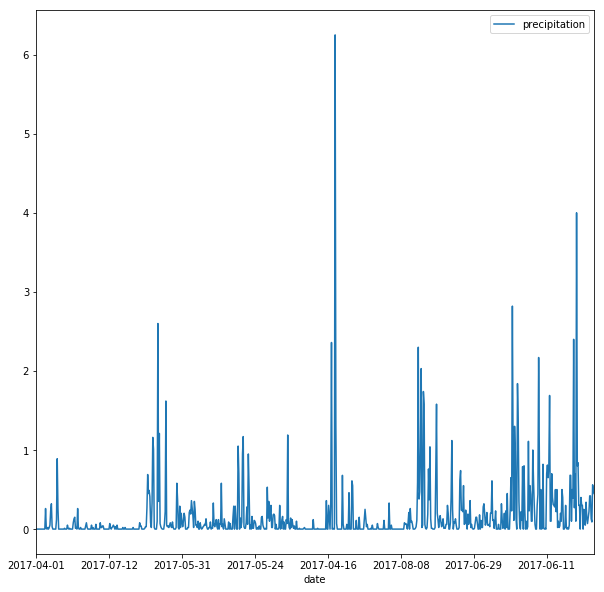

In [40]:
# Plot
prcp.reset_index().plot(x='date', y='precipitation', figsize=(10,10))

In [41]:
# Summary statistics
prcp.describe()

,precipitation
count,766.000000
mean,0.169191
std,0.429827
min,0.000000
25%,0.000000
50%,0.020000
75%,0.140000
max,6.250000


## Station Analysis

In [42]:
# Calculate the total number of stations
query = "select count(distinct name) from stations"
conn.execute(query).fetchall()[0][0]

9

In [43]:
# List the stations and observation counts in descending order
query = "select stations.name,count(measurements.tobs) as count from stations join measurements on stations.station=measurements.station group by name order by count desc"
conn.execute(query).fetchall()

[('WAIHEE 837.5, HI US', 2772),
 ('KANEOHE 838.1, HI US', 2696),
 ('WAIKIKI 717.2, HI US', 2685),
 ('WAIMANALO EXPERIMENTAL FARM, HI US', 2572),
 ('MANOA LYON ARBO 785.2, HI US', 2484),
 ('KUALOA RANCH HEADQUARTERS 886.9, HI US', 1937),
 ('HONOLULU OBSERVATORY 702.2, HI US', 1932),
 ('PEARL CITY, HI US', 683),
 ('UPPER WAHIAWA 874.3, HI US', 342)]

In [44]:
# Which station has the highest number of observation?
query = "select stations.name, count(measurements.tobs) as count from stations join measurements on stations.station=measurements.station group by name order by count desc limit 1"
conn.execute(query).fetchall()

[('WAIHEE 837.5, HI US', 2772)]

In [45]:
# Last 12 months of tobs
query = '''select stations.name,measurements.tobs, measurements.date from measurements
join stations on stations.station=measurements.station
where measurements.date >=date('now', 'start of month', '-12 month')
AND measurements.date < date('now', 'start of month')'''
conn.execute(query).fetchall()

[('WAIKIKI 717.2, HI US', 76, '2017-04-01'),
 ('WAIKIKI 717.2, HI US', 76, '2017-04-02'),
 ('WAIKIKI 717.2, HI US', 77, '2017-04-03'),
 ('WAIKIKI 717.2, HI US', 76, '2017-04-04'),
 ('WAIKIKI 717.2, HI US', 78, '2017-04-05'),
 ('WAIKIKI 717.2, HI US', 77, '2017-04-06'),
 ('WAIKIKI 717.2, HI US', 77, '2017-04-07'),
 ('WAIKIKI 717.2, HI US', 77, '2017-04-08'),
 ('WAIKIKI 717.2, HI US', 72, '2017-04-09'),
 ('WAIKIKI 717.2, HI US', 75, '2017-04-10'),
 ('WAIKIKI 717.2, HI US', 79, '2017-04-11'),
 ('WAIKIKI 717.2, HI US', 78, '2017-04-12'),
 ('WAIKIKI 717.2, HI US', 77, '2017-04-13'),
 ('WAIKIKI 717.2, HI US', 75, '2017-04-14'),
 ('WAIKIKI 717.2, HI US', 73, '2017-04-15'),
 ('WAIKIKI 717.2, HI US', 74, '2017-04-16'),
 ('WAIKIKI 717.2, HI US', 74, '2017-04-17'),
 ('WAIKIKI 717.2, HI US', 75, '2017-04-18'),
 ('WAIKIKI 717.2, HI US', 74, '2017-04-19'),
 ('WAIKIKI 717.2, HI US', 78, '2017-04-20'),
 ('WAIKIKI 717.2, HI US', 73, '2017-04-21'),
 ('WAIKIKI 717.2, HI US', 76, '2017-04-22'),
 ('WAIKIKI

In [46]:
# Last 12 months of tobs filtered by highest number of observations
query = '''select stations.name, measurements.tobs, count(measurements.tobs) as Frequency from measurements
join stations on stations.station=measurements.station
Where measurements.date >= date('now', 'start of month', '-12 month')
AND measurements.date < date('now', 'start of month')
group by stations.name order by Frequency desc'''
results = conn.execute(query).fetchall()
results

[('WAIKIKI 717.2, HI US', 81, 140),
 ('WAIHEE 837.5, HI US', 79, 131),
 ('MANOA LYON ARBO 785.2, HI US', 76, 124),
 ('WAIMANALO EXPERIMENTAL FARM, HI US', 82, 124),
 ('KANEOHE 838.1, HI US', 77, 122),
 ('KUALOA RANCH HEADQUARTERS 886.9, HI US', 82, 108),
 ('PEARL CITY, HI US', 80, 17)]

In [47]:
# save results to dataframe
tobs = pd.DataFrame(results, columns=['name', 'tobs', 'frequency'])
tobs

,name,tobs,frequency
0,"WAIKIKI 717.2, HI US",81,140
1,"WAIHEE 837.5, HI US",79,131
2,"MANOA LYON ARBO 785.2, HI US",76,124
3,"WAIMANALO EXPERIMENTAL FARM, HI US",82,124
4,"KANEOHE 838.1, HI US",77,122
5,"KUALOA RANCH HEADQUARTERS 886.9, HI US",82,108
6,"PEARL CITY, HI US",80,17


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016359AABE48>]], dtype=object)

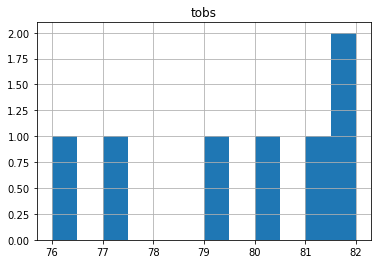

In [48]:
tobs.hist(column='tobs', bins=12)

## Temperatur Analysis

In [49]:
def calc_temps(start, end):
    tmin = ''
    tmax = ''
    
    min = conn.execute('''select min(tobs) from measurements where date between ? and ?''', (start, end)).fetchall()
    max = conn.execute('''select max(tobs) from measurements where date between ? and ?''',(start, end)).fetchall()
    
    for i in min:
        tmin = i[0]
        
    for i in max:
        tmax = i[0]
        
    avg = (int(tmin) + int(tmax)) / 2
    return tmax, tmin, avg

In [50]:
results = calc_temps('2017-01-01', '2017-01-05')
results

(74, 62, 68.0)

In [51]:
temp = pd.DataFrame([results], columns= ['Max', 'Min', 'Avg'])
temp

,Max,Min,Avg
0,74,62,68.0


In [52]:
yerr = temp.Max - temp.Min

Text(0,0.5,'Temp(F)')

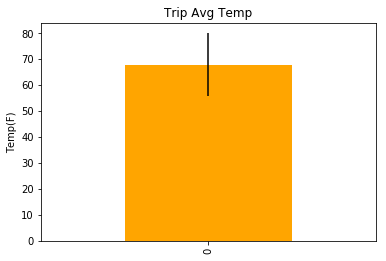

In [53]:
temp['Avg'].plot(kind="bar", title='Trip Avg Temp', yerr=int(yerr), color='orange')
plt.ylabel('Temp(F)')

In [54]:
from flask import Flask, jsonify

In [55]:
app = Flask(__name__)


In [ ]:
import sqlalchemy
from sqlalchemy import create_engine, MetaData
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import Column, Integer, String, Numeric, Text, Float, Date
import numpy as np

engine = create_engine("sqlite:///hawaii.sqlite")

@app.route("/")
def welcome():
    """List all available api routes."""
    return (
    f"Available Routes:<br/>"
    f"/api/v1.0/precipitation<br/>"
    f"/api/v1.0/tobs<br/>"
    f"/api/v1.0/<start>/<end><br/>"
    )


@app.route("/api/v1.0/precipitation")
def precipitation():
    """Return dates and tobs from the last year"""
    conn = engine.connect()
    
    query = "select date, tobs, prcp from measurements where date >= date('now', 'start of month', '-12 month') AND date < date('now', 'start of month')"
    results = conn.execute(query).fetchall()
    
    data=[]
    for i in results:
        data.append({i.date: i.tobs})
        
        return jsonify(data)

@app.route("/api/v1.0/stations")
def stations():
    """ Return a list of stations """
    
    conn = engine.connect()
    
    query = "select * from stations"
    
    results = conn.execute(query).fetchall()
    
    stations = []
    station_dict = {}
    
    for i in results:
        print(i)
        station_dict['station'] = i.station
        station_dict['name'] = i.name
        station_dict['latitude'] = i.latitude
        station_dict['longitude'] = i.longitude
        station_dict['elevation'] = i.elevation
        stations.append(station_dict)
    print(stations)
    
    return jsonify(stations)

@app.route('/api/v1.0/tobs')
def tob():
    """return a list of tobs for the past year"""
    
    conn = engine.connect()
    query = '''select tobs from measurements where date >= date('now', 'start of month', '-12 month') AND date < date('now', 'start of month')'''
    results = conn.execute(query).fetchall()
    
    data = []
    for i in results:
        print(i)
        data.append(i.tobs)
    return jsonify(data)

if __name__ == '__main__':
    app.run(debug=True)